In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# device check and configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
# Hyper-parameters
num_epochs = 200
batch_size = 20
learning_rate = 0.001

In [4]:
transform = transforms.Compose(
            [transforms.ToTensor(), 
             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
            )


In [5]:
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform)


Files already downloaded and verified


In [6]:
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform)


Files already downloaded and verified


In [7]:
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True)



In [8]:
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=True)


In [9]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog',
          'horse', 'ship', 'truck')


In [10]:
def imshow(img):
    img /= 2
    img += 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

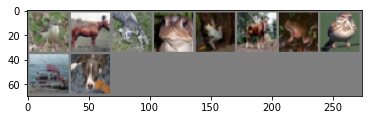

In [11]:
# show random training images

dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))


In [12]:
# implement conv net
class ConvNet(nn.Module):
    
    def __init__(self):
        
        super(ConvNet, self).__init__()
        
        # input: 3 color, output: 6, kernel size: 5
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        # 2 by 2 max pooling
        self.pool = nn.MaxPool2d(2, 2)
        
        # input: 6 by conv1 output, output: 16, kernel size: 5
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # input: 16(conv2output) * 1stkernelsize * 2ndkernelsize
        # output: 120
        self.fc1 = nn.Linear(16*5*5, 120)
        
        self.fc2 = nn.Linear(120, 84)
        
        # last output must be same as label(10 in this case)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.pool(F.relu(self.conv1(x)))
        
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(-1, 16*5*5)
        
        x = F.relu(self.fc1(x))
        
        x = F.relu(self.fc2(x))
        
        x = self.fc3(x)
        
        return x



In [13]:
model = ConvNet().to(device)


In [14]:
criterion = nn.CrossEntropyLoss()


In [15]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [16]:
n_total_steps = len(train_loader)


In [17]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape : [4, 3, 32, 32] or 4, 3, 1024
        # input_layer : 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i-1) % 2000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}, Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}]')
        
print('###TRAINING FINISHED###')


Epoch [1/200, Step [2/5000], Loss: 2.3141]
Epoch [1/200, Step [2002/5000], Loss: 2.2854]
Epoch [1/200, Step [4002/5000], Loss: 2.3058]
Epoch [2/200, Step [2/5000], Loss: 2.2920]
Epoch [2/200, Step [2002/5000], Loss: 2.2948]
Epoch [2/200, Step [4002/5000], Loss: 2.2896]
Epoch [3/200, Step [2/5000], Loss: 2.2796]
Epoch [3/200, Step [2002/5000], Loss: 2.3022]
Epoch [3/200, Step [4002/5000], Loss: 2.1694]
Epoch [4/200, Step [2/5000], Loss: 2.0312]
Epoch [4/200, Step [2002/5000], Loss: 1.8331]
Epoch [4/200, Step [4002/5000], Loss: 1.8751]
Epoch [5/200, Step [2/5000], Loss: 2.0376]
Epoch [5/200, Step [2002/5000], Loss: 2.2890]
Epoch [5/200, Step [4002/5000], Loss: 1.9500]
Epoch [6/200, Step [2/5000], Loss: 2.1961]
Epoch [6/200, Step [2002/5000], Loss: 1.7644]
Epoch [6/200, Step [4002/5000], Loss: 1.7432]
Epoch [7/200, Step [2/5000], Loss: 1.9717]
Epoch [7/200, Step [2002/5000], Loss: 1.9802]
Epoch [7/200, Step [4002/5000], Loss: 2.0258]
Epoch [8/200, Step [2/5000], Loss: 1.8999]
Epoch [8/200

Epoch [60/200, Step [4002/5000], Loss: 0.8384]
Epoch [61/200, Step [2/5000], Loss: 0.9054]
Epoch [61/200, Step [2002/5000], Loss: 1.1658]
Epoch [61/200, Step [4002/5000], Loss: 0.6311]
Epoch [62/200, Step [2/5000], Loss: 0.9465]
Epoch [62/200, Step [2002/5000], Loss: 0.7812]
Epoch [62/200, Step [4002/5000], Loss: 0.4074]
Epoch [63/200, Step [2/5000], Loss: 0.5982]
Epoch [63/200, Step [2002/5000], Loss: 0.6011]
Epoch [63/200, Step [4002/5000], Loss: 0.8337]
Epoch [64/200, Step [2/5000], Loss: 0.7561]
Epoch [64/200, Step [2002/5000], Loss: 0.5860]
Epoch [64/200, Step [4002/5000], Loss: 0.5791]
Epoch [65/200, Step [2/5000], Loss: 0.6547]
Epoch [65/200, Step [2002/5000], Loss: 0.8070]
Epoch [65/200, Step [4002/5000], Loss: 0.3773]
Epoch [66/200, Step [2/5000], Loss: 1.0397]
Epoch [66/200, Step [2002/5000], Loss: 0.4806]
Epoch [66/200, Step [4002/5000], Loss: 0.6503]
Epoch [67/200, Step [2/5000], Loss: 1.3630]
Epoch [67/200, Step [2002/5000], Loss: 0.4538]
Epoch [67/200, Step [4002/5000], L

Epoch [119/200, Step [4002/5000], Loss: 0.1766]
Epoch [120/200, Step [2/5000], Loss: 0.2177]
Epoch [120/200, Step [2002/5000], Loss: 0.2011]
Epoch [120/200, Step [4002/5000], Loss: 0.7969]
Epoch [121/200, Step [2/5000], Loss: 0.2403]
Epoch [121/200, Step [2002/5000], Loss: 0.0365]
Epoch [121/200, Step [4002/5000], Loss: 0.9003]
Epoch [122/200, Step [2/5000], Loss: 0.1924]
Epoch [122/200, Step [2002/5000], Loss: 0.4018]
Epoch [122/200, Step [4002/5000], Loss: 0.4283]
Epoch [123/200, Step [2/5000], Loss: 0.4020]
Epoch [123/200, Step [2002/5000], Loss: 0.6728]
Epoch [123/200, Step [4002/5000], Loss: 0.4559]
Epoch [124/200, Step [2/5000], Loss: 0.1064]
Epoch [124/200, Step [2002/5000], Loss: 0.3577]
Epoch [124/200, Step [4002/5000], Loss: 0.2738]
Epoch [125/200, Step [2/5000], Loss: 0.4721]
Epoch [125/200, Step [2002/5000], Loss: 0.0229]
Epoch [125/200, Step [4002/5000], Loss: 0.0522]
Epoch [126/200, Step [2/5000], Loss: 0.0596]
Epoch [126/200, Step [2002/5000], Loss: 0.5827]
Epoch [126/20

Epoch [178/200, Step [2/5000], Loss: 0.2191]
Epoch [178/200, Step [2002/5000], Loss: 0.0038]
Epoch [178/200, Step [4002/5000], Loss: 0.0520]
Epoch [179/200, Step [2/5000], Loss: 0.0207]
Epoch [179/200, Step [2002/5000], Loss: 0.0450]
Epoch [179/200, Step [4002/5000], Loss: 0.1522]
Epoch [180/200, Step [2/5000], Loss: 0.2584]
Epoch [180/200, Step [2002/5000], Loss: 0.0418]
Epoch [180/200, Step [4002/5000], Loss: 0.0826]
Epoch [181/200, Step [2/5000], Loss: 0.2414]
Epoch [181/200, Step [2002/5000], Loss: 0.0179]
Epoch [181/200, Step [4002/5000], Loss: 0.1634]
Epoch [182/200, Step [2/5000], Loss: 0.0706]
Epoch [182/200, Step [2002/5000], Loss: 0.0319]
Epoch [182/200, Step [4002/5000], Loss: 0.0096]
Epoch [183/200, Step [2/5000], Loss: 0.4987]
Epoch [183/200, Step [2002/5000], Loss: 0.1342]
Epoch [183/200, Step [4002/5000], Loss: 0.3666]
Epoch [184/200, Step [2/5000], Loss: 0.1313]
Epoch [184/200, Step [2002/5000], Loss: 0.0527]
Epoch [184/200, Step [4002/5000], Loss: 0.3111]
Epoch [185/20

In [18]:
# test model

with torch.no_grad():
    
    n_correct = 0
    n_samples = 0
    n_class_correct = np.zeros(10)
    n_class_samples = np.zeros(10)
    
    for images, labels in test_loader:
        
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        
        for i in range(batch_size):
            
            label = labels[i]
            pred = predicted[i]
            
            if(label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
            
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc}%')
    
    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')



Accuracy of the network: 59.14%
Accuracy of plane: 61.1 %
Accuracy of car: 71.2 %
Accuracy of bird: 48.1 %
Accuracy of cat: 40.4 %
Accuracy of deer: 51.8 %
Accuracy of dog: 49.2 %
Accuracy of frog: 61.0 %
Accuracy of horse: 65.7 %
Accuracy of ship: 75.6 %
Accuracy of truck: 67.3 %


In [19]:
print(torch.cuda.memory_allocated()/1024/1024)

0.59716796875
